In [1]:
# default_exp core

# Few-shot Learning with GPT-J

> API details.

In [2]:
#hide
from nbdev.showdoc import *
import pandas as pd

In [110]:
import nlpcloud
client = nlpcloud.Client("gpt-j", "d2fcc6841e6a127026c15ac84801d0ea0afee836", gpu=False)

In [25]:
# example API call
generation = client.generation("""Insult: You fight like a dairy Farmer!
            Comeback: How appropriate. You fight like a cow!
            ###
            Insult: This is the END for you, you gutter crawling cur!
            Comeback: And I've got a little TIP for you, get the POINT?
            ###
            Insult: I've spoken with apes more polite than you!
            Comeback: I'm glad to hear you attended your family reunion!
            ###
            Insult: Soon you'll be wearing my sword like a shish kebab!
            Comeback: First you'd better stop waving it like a feather duster.
            ###
            Insult: I once owned a dog that was smarter than you.
            Comeback: """,
    max_length=100,
    length_no_input=True,
    end_sequence="\n###",
    remove_input=True)
print(generation["generated_text"])

 What do you want, his FAVORITE treat?



## 📙 Insult Database
From Monkey Island fandom wiki.  
https://monkeyisland.fandom.com/wiki/Insult_Sword_Fighting

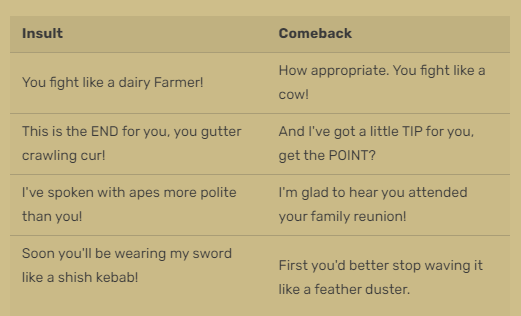

In [20]:
tb = pd.read_html("https://monkeyisland.fandom.com/wiki/Insult_Sword_Fighting")
pirate = tb[0]
master = tb[1] 

df = pirate
df.head()

,Insult,Comeback
0,You fight like a dairy Farmer!,How appropriate. You fight like a cow!
1,"This is the END for you, you gutter crawling cur!","And I've got a little TIP for you, get the POINT?"
2,I've spoken with apes more polite than you!,I'm glad to hear you attended your family reun...
3,Soon you'll be wearing my sword like a shish k...,First you'd better stop waving it like a feath...
4,People fall at my feet when they see me coming!,Even BEFORE they smell your breath?


##  ⚔️ Generate Swordfight

In [121]:
def create_input_string(insult, training_examples=5):
    t = ''.join(f"""Insult: {df.Insult[i]}\nComeback: {df.Comeback[i]}\n###\n""" for i in range(training_examples))
    return f"{t}Insult: {insult}\nComeback:"

t = create_input_string('Every word you say to me is stupid.', training_examples=3)
print(t)

Insult: You fight like a dairy Farmer!
Comeback: How appropriate. You fight like a cow!
###
Insult: This is the END for you, you gutter crawling cur!
Comeback: And I've got a little TIP for you, get the POINT?
###
Insult: I've spoken with apes more polite than you!
Comeback: I'm glad to hear you attended your family reunion!
###
Insult: Every word you say to me is stupid.
Comeback:

In [127]:
def generate_comback(insult, outputs, training_examples=3):
    print(f'Insult: {insult}')
    t = create_input_string(insult, training_examples)
    for i in range(outputs):
        generation = client.generation(t,
            max_length=100,
            length_no_input=True,
            end_sequence="\n###",
            remove_input=True)
        comeback = generation["generated_text"].strip('\n')
        print(f"☠️ Comeback: ({i}) {comeback}")


☠️🏴‍☠️☠️

In [128]:
generate_comback('Every word you say to me is stupid.', outputs=3, training_examples=10)

Insult: Every word you say to me is stupid.

☠️ Comeback: (0)  Well you're the one that's stupid.

☠️ Comeback: (1)  Like your IQ.

☠️ Comeback: (2)  I'll have you know I was just about to make a "Stupid" joke.

In [126]:
generate_comback('Killing you would be justifiable homicide!', outputs=3, training_examples=15)

Insult: Killing you would be justifiable homicide!

Comeback: (0)  Unless it was murder, then you'd be guilty of suicide.

Comeback: (1)  Well, at least your mother's not alive to see it.

Comeback: (2)  Oh, please. I'd be arrested before I even hit the ground.

In [130]:
generate_comback("Heaven preserve me! You look like something that's died!", outputs=3, training_examples=15)

Insult: Heaven preserve me! You look like something that's died!

☠️ Comeback: (0)  If you ever need an autopsy, I'd be glad to do it.

☠️ Comeback: (1)  Are you having trouble keeping it up?

☠️ Comeback: (2)  So I guess you're right. It was the hay.

In [137]:
generate_comback("You're the ugliest monster ever created!", outputs=2, training_examples=15)

Insult: You're the ugliest monster ever created!

☠️ Comeback: (0)  I'm sure you've met a few yourself.

☠️ Comeback: (1)  I wouldn't be surprised if you were the father of all monsters.